In [2]:
import pandas as pd

# Load all datasets
df_initial = pd.read_csv(r"C:\Users\Latha E\Heart_ML\datasets\uci_heart.csv")  # Raw dataset
df_basic = pd.read_csv(r"C:\Users\Latha E\Heart_ML\datasets\heart_disease_cleaned_basic.csv")  # Basic imputation
df_advanced = pd.read_csv(r"C:\Users\Latha E\Heart_ML\datasets\heart_disease_cleaned_advanced.csv")  # Advanced imputation
df_optimized = pd.read_csv(r"C:\Users\Latha E\Heart_ML\datasets\_optimized_advanced_heart_disease_cleaned.csv")  # Optimized imputation


In [3]:
# Function to get missing values percentage
def missing_values(df, name):
    missing_counts = df.isnull().sum()
    missing_percent = (missing_counts / len(df)) * 100
    missing_df = pd.DataFrame({'Feature': df.columns, 'Missing Count': missing_counts, 'Missing %': missing_percent})
    missing_df = missing_df[missing_df["Missing Count"] > 0]  # Only show features with missing values
    print(f"\n🔹 Missing Values in {name} Dataset:")
    print(missing_df)

# Check missing values across datasets
missing_values(df_initial, "Initial")
missing_values(df_basic, "Basic Imputation")
missing_values(df_advanced, "Advanced Imputation")
missing_values(df_optimized, "Optimized Imputation")



🔹 Missing Values in Initial Dataset:
           Feature  Missing Count  Missing %
trestbps  trestbps             59   6.413043
chol          chol             30   3.260870
fbs            fbs             90   9.782609
restecg    restecg              2   0.217391
thalch      thalch             55   5.978261
exang        exang             55   5.978261
oldpeak    oldpeak             62   6.739130
slope        slope            309  33.586957
ca              ca            611  66.413043
thal          thal            486  52.826087

🔹 Missing Values in Basic Imputation Dataset:
Empty DataFrame
Columns: [Feature, Missing Count, Missing %]
Index: []

🔹 Missing Values in Advanced Imputation Dataset:
Empty DataFrame
Columns: [Feature, Missing Count, Missing %]
Index: []

🔹 Missing Values in Optimized Imputation Dataset:
Empty DataFrame
Columns: [Feature, Missing Count, Missing %]
Index: []


2)Numerical

In [10]:
# Find common columns across all datasets
common_cols = set(df_initial.columns) & set(df_basic.columns) & set(df_advanced.columns) & set(df_optimized.columns)
common_cols = list(common_cols)  # Convert to list for indexing

print("✅ Common Columns:", common_cols)
print(f"Common columns ({len(common_cols)}): {common_cols}")



✅ Common Columns: ['fbs', 'age', 'thalch', 'chol', 'sex', 'restecg', 'target', 'exang', 'dataset', 'cp', 'oldpeak', 'trestbps']
Common columns (12): ['fbs', 'age', 'thalch', 'chol', 'sex', 'restecg', 'target', 'exang', 'dataset', 'cp', 'oldpeak', 'trestbps']


In [11]:
# Compare summary statistics of numerical columns
num_cols = df_initial.select_dtypes(include=['number']).columns

summary_initial = df_initial[common_cols].describe()
summary_basic = df_basic[common_cols].describe()
summary_advanced = df_advanced[common_cols].describe()
summary_optimized = df_optimized[common_cols].describe()


# Save comparison as CSV files for better inspection
summary_initial.to_csv("summary_initial.csv")
summary_basic.to_csv("summary_basic.csv")
summary_advanced.to_csv("summary_advanced.csv")
summary_optimized.to_csv("summary_optimized.csv")

# Display comparison
print("\n🔹 Numerical Summary of Initial Dataset:")
print(summary_initial)

print("\n🔹 Numerical Summary of Basic Imputation Dataset:")
print(summary_basic)

print("\n🔹 Numerical Summary of Advanced Imputation Dataset:")
print(summary_advanced)

print("\n🔹 Numerical Summary of Optimized Imputation Dataset:")
print(summary_optimized)



🔹 Numerical Summary of Initial Dataset:
              age      thalch        chol      target     oldpeak    trestbps
count  920.000000  865.000000  890.000000  920.000000  858.000000  861.000000
mean    53.510870  137.545665  199.130337    0.995652    0.878788  132.132404
std      9.424685   25.926276  110.780810    1.142693    1.091226   19.066070
min     28.000000   60.000000    0.000000    0.000000   -2.600000    0.000000
25%     47.000000  120.000000  175.000000    0.000000    0.000000  120.000000
50%     54.000000  140.000000  223.000000    1.000000    0.500000  130.000000
75%     60.000000  157.000000  268.000000    2.000000    1.500000  140.000000
max     77.000000  202.000000  603.000000    4.000000    6.200000  200.000000

🔹 Numerical Summary of Basic Imputation Dataset:
              age      thalch        chol      target     oldpeak    trestbps
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000
mean    53.510870  137.692391  199.908696    0.9956

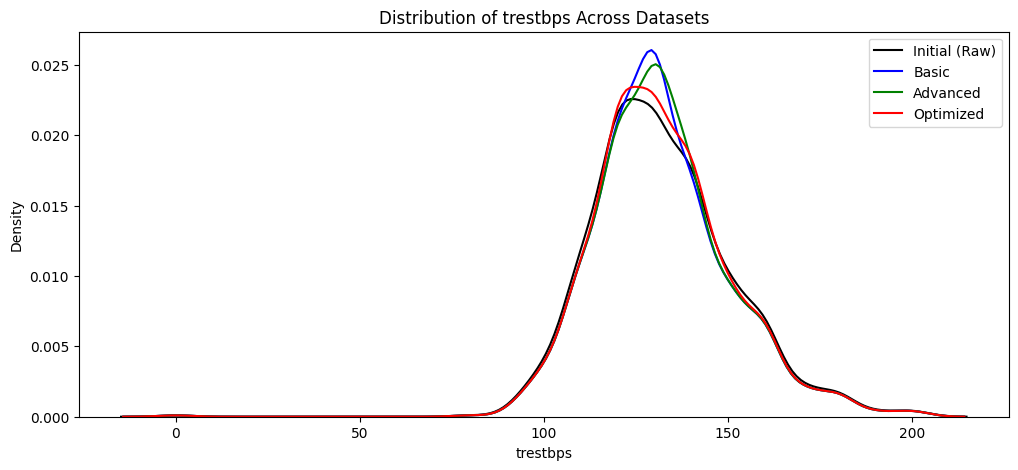

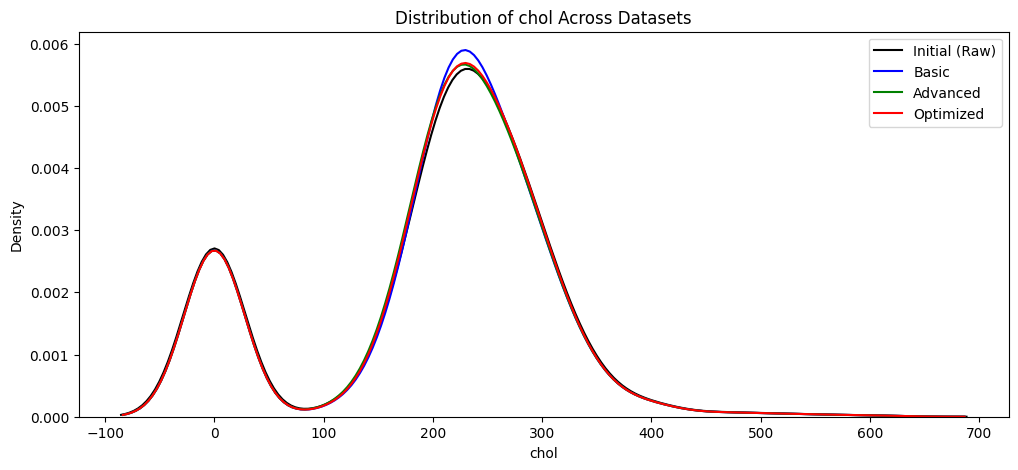

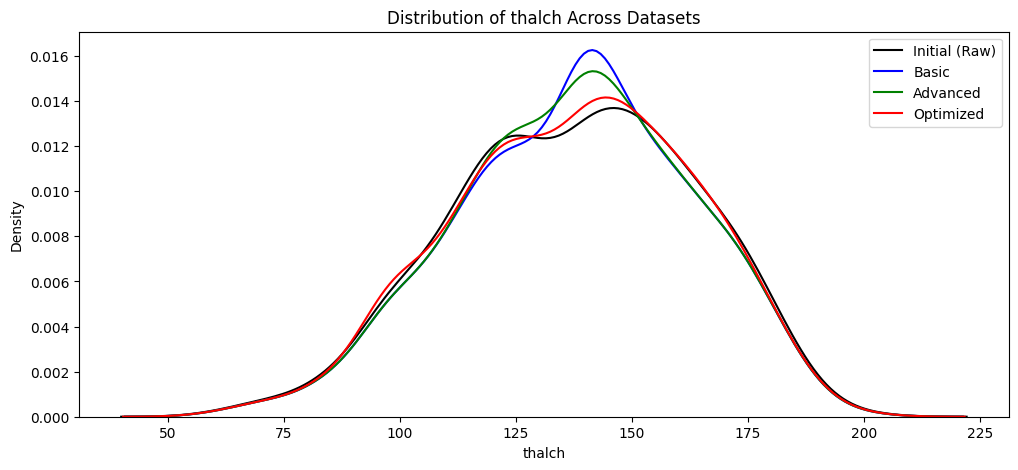

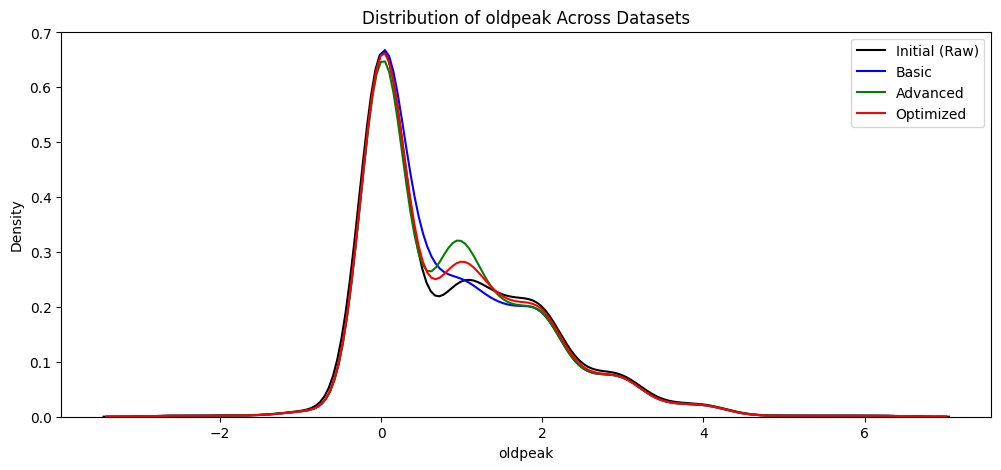

In [12]:
#3 visulize

import matplotlib.pyplot as plt
import seaborn as sns

# Function to compare feature distributions across datasets
def plot_feature_distribution(feature):
    plt.figure(figsize=(12, 5))
    sns.kdeplot(df_initial[feature], label="Initial (Raw)", color="black")
    sns.kdeplot(df_basic[feature], label="Basic", color="blue")
    sns.kdeplot(df_advanced[feature], label="Advanced", color="green")
    sns.kdeplot(df_optimized[feature], label="Optimized", color="red")
    plt.legend()
    plt.title(f"Distribution of {feature} Across Datasets")
    plt.show()

# Plot for key numerical features
for feature in ["trestbps", "chol", "thalch", "oldpeak"]:
    plot_feature_distribution(feature)


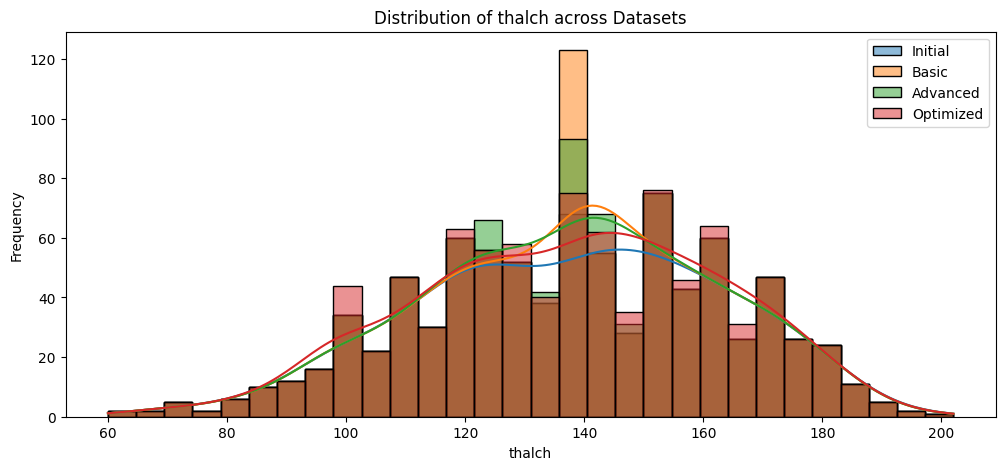

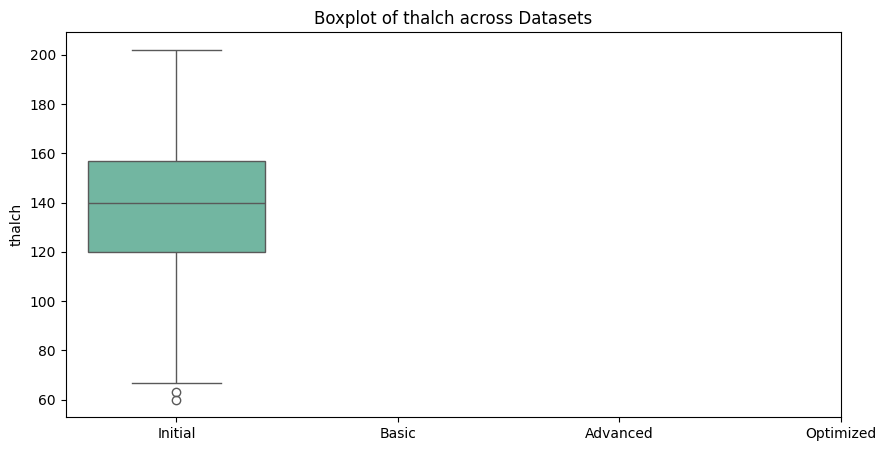

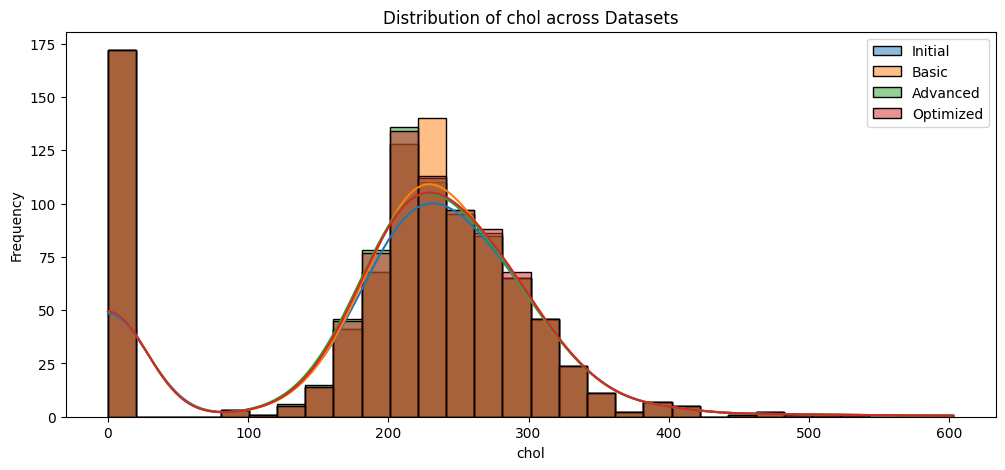

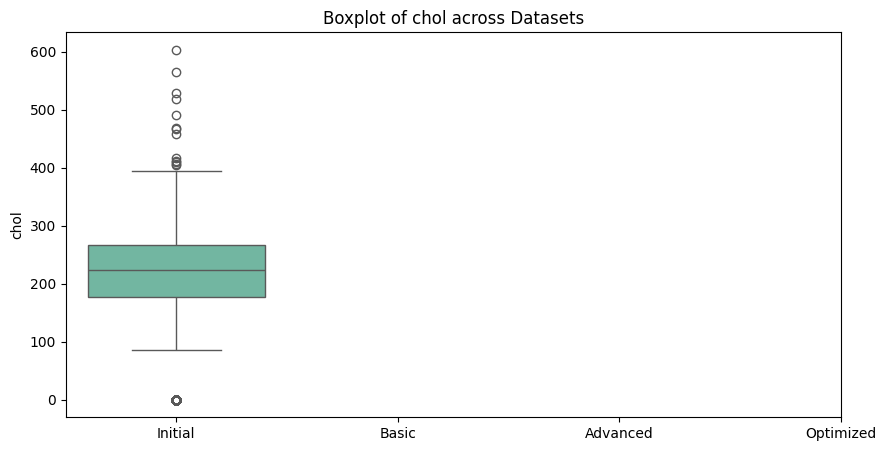

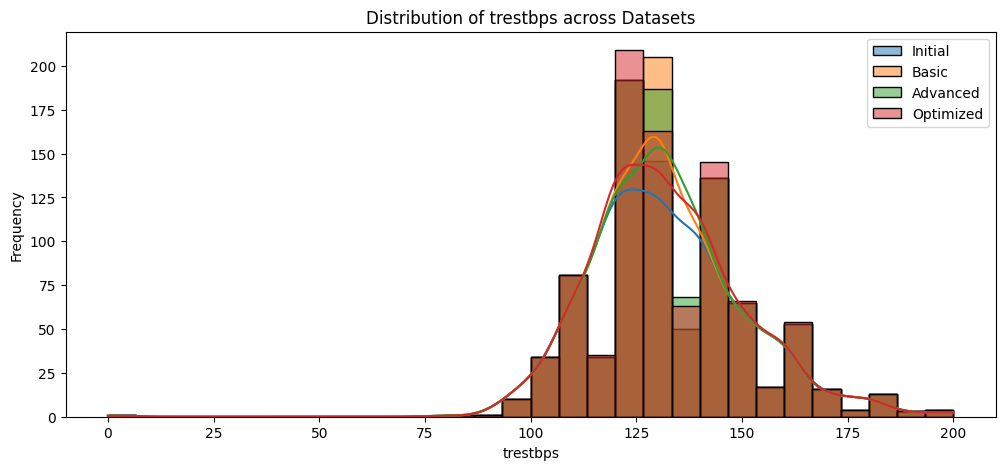

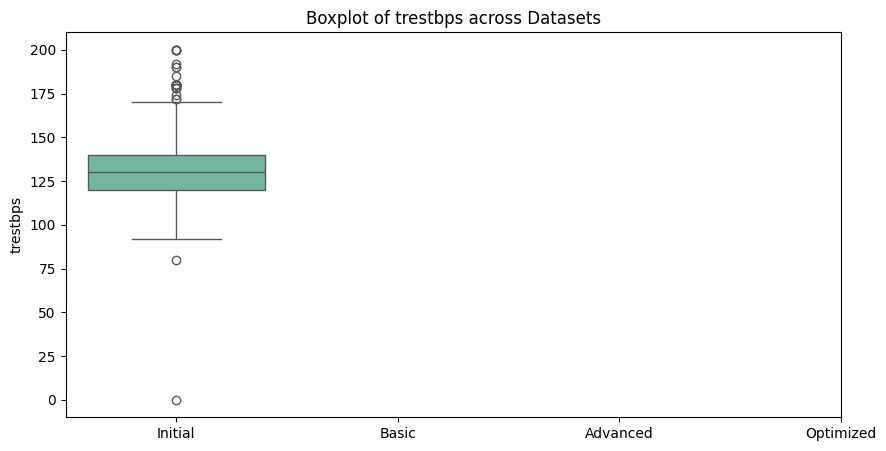

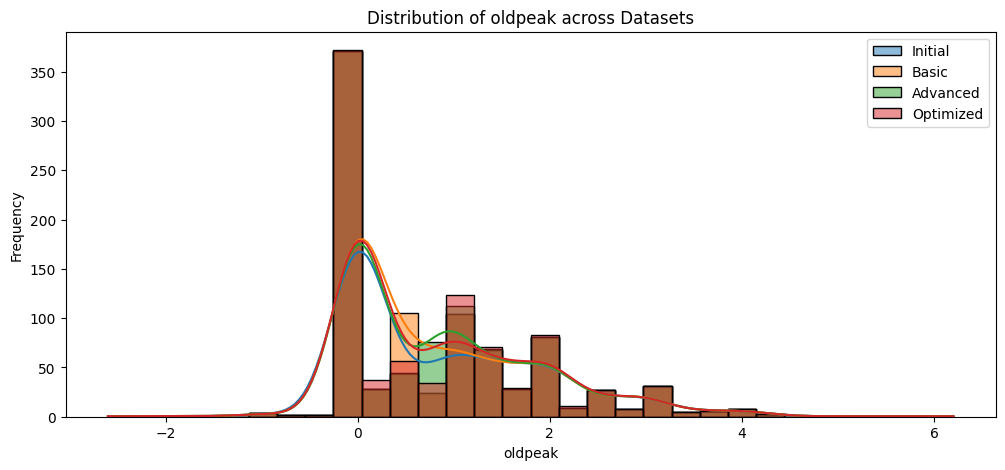

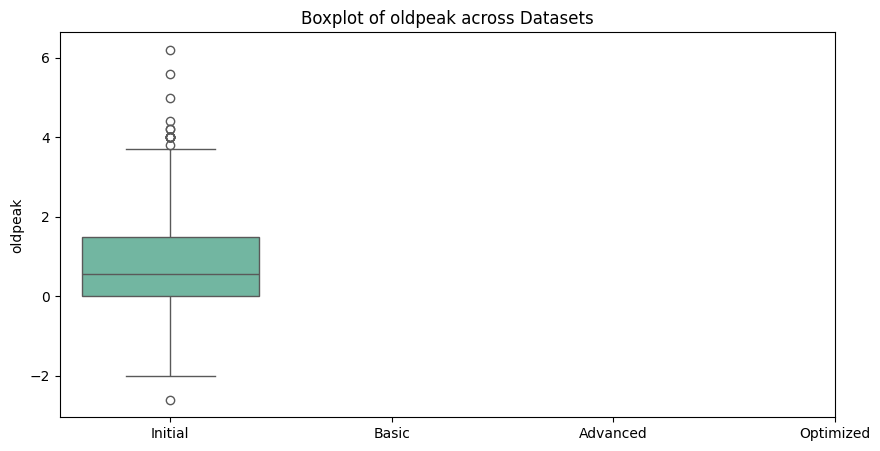

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distributions(datasets, feature):
    plt.figure(figsize=(12, 5))
    for name, df in datasets.items():
        sns.histplot(df[feature], kde=True, label=name, bins=30, alpha=0.5)
    plt.title(f'Distribution of {feature} across Datasets')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

def plot_boxplots(datasets, feature):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[df[feature] for df in datasets.values()],
                palette='Set2')
    plt.xticks(ticks=range(len(datasets)), labels=datasets.keys())
    plt.title(f'Boxplot of {feature} across Datasets')
    plt.ylabel(feature)
    plt.show()

# Load datasets into a dictionary
datasets = {
    "Initial": df_initial,
    "Basic": df_basic,
    "Advanced": df_advanced,
    "Optimized": df_optimized
}

# Features to compare
features = ['thalch', 'chol', 'trestbps', 'oldpeak']

# Generate plots
for feature in features:
    plot_distributions(datasets, feature)
    plot_boxplots(datasets, feature)
